In [127]:
import numpy as np
import random
from matplotlib import pyplot as plt

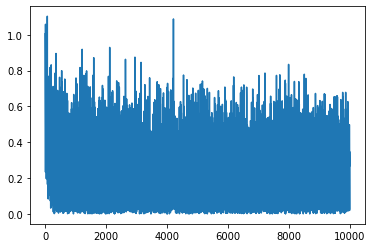

In [128]:
Horizon = 10000
K = 3 #Number of Arms
var = 0.2
#r = [np.random.normal(mu, var, Horizon) for mu in ] #True Reward Distribution
Theta = [i*0.01 for i in range(10,45,5)]
t = [0.1,0.2,0.3]
mu_ci = [0,0,0]
r = np.zeros([K,Horizon], dtype = 'float')
for i in range(K):
    for j in range(Horizon):
        r[i][j] = abs(random.gauss(mu_ci[i]+(j+1)**-t[i],var))
        #r[i][j] = (int(j/100)+1)**-Theta[i]
plt.plot(r[1])

In [129]:
N = np.zeros(K,dtype='int') #Initialization

In [130]:
reward = 0
# Ramp up by playing each arm once and updating the counts
for i in range(K):
    arm = i
    reward += r[arm][int(N[arm])]
    print(reward)
    N[arm] += 1

1.0533606837577378
2.0589725855621896
2.9702121827415864


In [131]:
print(reward)

2.9702121827415864


In [132]:
def mu(mu_mean, n, theta_star):
    return mu_mean + (float(int(n/100)+1))**(-1*theta_star)

In [133]:
def mu_sum(mu_c, n, theta): #Rotting part
    mu_t = np.zeros([len(mu_c),len(theta)])
    #print(mu_t.shape)
    for i in range(len(mu_c)):
        mu_t[i,:] = mu_c[i]
    for i in range(len(mu_c)):
        for j in range(len(theta)):
            for k in range(n[i]):
                mu_t[i][j] += mu(mu_c[i], k, theta[j])
    #print(mu_t)
    return mu_t

In [134]:
# N = [2,4,5,6,2]
# r_t = [np.sum(r[i][:N[i]]) for i in range(K)]
# print(r_t)
# print(mu_sum(mu_ci, N, Theta))
# Y_t = (r_t - mu_sum(mu_ci, N, Theta).T).T
# print(Y_t)

X = [1,1,1,1,1]
Y = np.zeros((5,3))
for i in range(5):
    for j in range(3):
        Y[i][j]=i+j
print(Y.T)
print(X-Y.T)

Z = np.argmin(X-Y.T, axis =1)
print(Z)

[[0. 1. 2. 3. 4.]
 [1. 2. 3. 4. 5.]
 [2. 3. 4. 5. 6.]]
[[ 1.  0. -1. -2. -3.]
 [ 0. -1. -2. -3. -4.]
 [-1. -2. -3. -4. -5.]]
[4 4 4]


In [135]:
regret = []
lastRegret=0
i=0

In [ ]:
# Running arms in Horizon

while np.sum(N) < Horizon:
    # Estimate true reward distribution for each arm
    r_t = [np.sum(r[i][:N[i]]) for i in range(K)]
    
    Y_t = (r_t - mu_sum(mu_ci, N, Theta).T).T
    
    theta_hat = np.argmin(np.abs(Y_t), axis = 1)
    
    # Select the arm with the highest value of mu
    arm = np.argmax([mu(mu_ci[i], N[i]+1, theta_hat[i]) for i in range(K)])
    muOracle=[mu(mu_ci[i], N[i]+1, t[i]) for i in range(K)]
    muMax=max(muOracle)
    muExpected=muOracle[arm]
    # Update the count for the selected arm
    N[arm] += 1
    
    # Get the regret for the given arm
    reward += r[arm][N[arm]]
    #print(reward)
    regret.append(lastRegret+muMax - muExpected)  # Use closest-to-origin approach
    #regret.append(np.sum(N)*np.max(r) - np.sum(r_t) - r[arm][N[arm]])  # Use closest-to-origin approach
    lastRegret+=muMax - muExpected
    # Print the arm and the reward
    # if i%100==0:
    #     print("Arm:", arm, "Regret:", regret[i-1])
    i+=1

In [ ]:
print(N[0])

In [ ]:
print(N[1])

In [ ]:
print(N[2])

In [ ]:
plt.plot(regret)